In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from prettytable import PrettyTable
import plotly.colors as pc
import json


# **Loading Data**

In [2]:
df=pd.read_csv('/kaggle/input/superstore-sales/Superstore.csv',  encoding='ISO-8859-1',parse_dates=['Order Date', 'Ship Date'])
with open("/kaggle/input/usa-states-geojson/us-states.json") as response:
    us_states_geojson = json.load(response)

# **Understand the Data**

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# **Data Cleaning**

In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d-%m-%Y')
df['Year'] = df['Order Date'].dt.year
df['Month_Num'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

In [9]:
pd.set_option("display.float_format", "{:.2f}".format)

# **Data Visualization**

In [10]:
df2=df[['Sales','Quantity','Discount','Profit']]
df2.describe()

,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00
mean,229.86,3.79,0.16,28.66
std,623.25,2.23,0.21,234.26
min,0.44,1.00,0.00,-6599.98
25%,17.28,2.00,0.00,1.73
50%,54.49,3.00,0.20,8.67
75%,209.94,5.00,0.20,29.36
max,22638.48,14.00,0.80,8399.98


/tmp/ipykernel_20/856678438.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


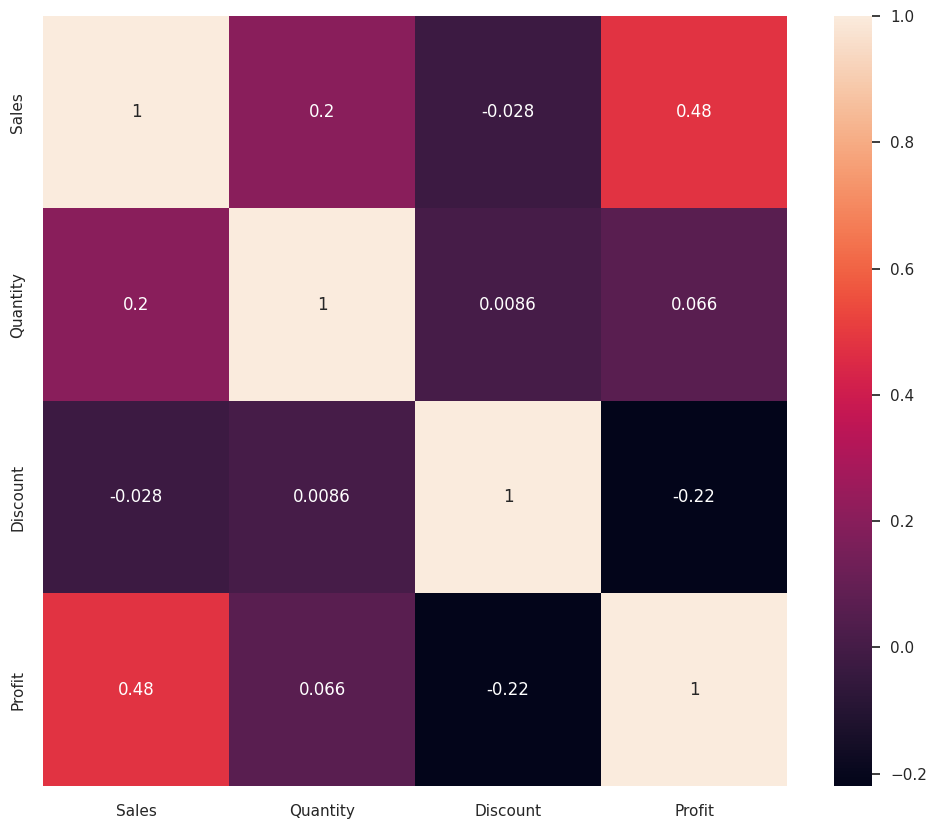

In [11]:
plt.style.use('seaborn')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

sns.heatmap(df2.corr(), annot = True)

plt.show()

In [12]:
df2=df[['Order Date', 'Sales', 'Profit']].set_index('Order Date').resample('M').sum()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df2.index, y=df2['Sales'], name='Sales',
                       hovertemplate='Month: %{x}<br>Sales: %{y:.2f}<extra></extra>',
                        ))

fig.add_trace(go.Scatter(x=df2.index, y=df2['Profit'], name='Profit',
                         hovertemplate='Month: %{x}<br> Profit: %{y:.2f}<extra></extra>'))

fig.update_layout(title=f"<b>Sales & Profit by Month<br><sup>The chart is for data from January-{min(df['Year'])} to December-{max(df['Year'])}</sup></br>",
                  xaxis_title='<b>Month',
                  yaxis_title='<b>Amount',
                  title_font_size = 20,)

fig.show()

In [13]:
Monthly_Sales = df.pivot_table(values='Sales', index=['Year', 'Month_Num', 'Month_Name'], aggfunc=sum).reset_index()
Monthly_Sales.sort_values(['Year','Month_Num'],ascending =[True,True],inplace=True)

fig= px.line(Monthly_Sales, x= 'Month_Name', y='Sales', color = 'Year')

fig.update_layout(
                  xaxis_title = '<b>Month',
                  yaxis_title = '<b>Sales ($)',
                  title= f"<b>Monthly Sales by Year <br><sup>The chart is for data from January-{min(df['Year'])} to December-{max(df['Year'])}</sup></br>",
                  title_font_size = 20,
                 )
fig.show()

In [14]:
Sales_by_Cities = df.groupby('Year')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)

fig = px.bar(Sales_by_Cities, x=Sales_by_Cities.index, y=['Sales','Profit'],
             color_discrete_map = {'Sales': '#143096', 'Profit': '#14963b'},
             barmode = 'group',
            )

fig.update_layout(
             xaxis_title = '<b>Year',
             yaxis_title = '<b>Value ($)',
             title= "<b>Sales and Profits by Year<br>",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )
fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>', selector=dict(name='Sales'))
fig.update_traces(hovertemplate='%{x}<br>Profit: $%{y:,.2f}<extra></extra>', selector=dict(name='Profit'))
fig.show()

In [15]:
Mean_Sales=df['Sales'].mean()
Mean_Discount=df['Discount'].mean()
Mean_Profit=df['Profit'].mean()

colors=['rgb(31, 119, 180)','rgb(255, 127, 14)']

fig = go.Figure(data=[
    go.Bar(
        x=['Sales', 'Profit'],
        y=[Mean_Sales, Mean_Profit],
        marker=dict(color=colors),
        text=[f"<b>Mean: {mean:.2f}</b>" for mean in [Mean_Sales, Mean_Profit]],
        hoverinfo='none',
        textfont=dict(size=14, color='black')
    )
])

fig.update_layout(
    title='<b>Mean Sales and Profit',
    yaxis_title='<b>Mean',
    title_font_size = 20,
)


fig.show()

In [16]:
Sales_by_Cities = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

fig = px.bar(Sales_by_Cities, x=Sales_by_Cities.index, y='Sales',
             color=Sales_by_Cities.index
            )

fig.update_layout(
    title='<b>Sales by Region <b>',
    xaxis_title='<b>Region',
    yaxis_title='<b>Sales',
    showlegend=False,
)

fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>')
fig.show()

In [17]:
Sales_by_Cities = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)

fig = px.bar(Sales_by_Cities, x=Sales_by_Cities.index, y=['Sales','Profit'],
             color_discrete_map = {'Sales': '#143096', 'Profit': '#14963b'},
             barmode = 'group',
            )

fig.update_layout(
             xaxis_title = '<b>Region', 
             yaxis_title = '<b>Sales',
             title= "<b>Sales and Profits by Region<br>",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )
fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>', selector=dict(name='Sales'))
fig.update_traces(hovertemplate='%{x}<br>Profit: $%{y:,.2f}<extra></extra>', selector=dict(name='Profit'))
fig.show()

In [18]:
Sales_by_Cities = df.groupby('Segment')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)

fig = px.bar(Sales_by_Cities, x=Sales_by_Cities.index, y=['Sales','Profit'],
             color_discrete_map = {'Sales': '#143096', 'Profit': '#14963b'},
             barmode = 'group',
            )

fig.update_layout(
             xaxis_title = '<b>Segment',
             yaxis_title = '<b>Value ($)',
             title= "<b>Sales and Profits by Segment<br>",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )
fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>', selector=dict(name='Sales'))
fig.update_traces(hovertemplate='%{x}<br>Profit: $%{y:,.2f}<extra></extra>', selector=dict(name='Profit'))
fig.show()

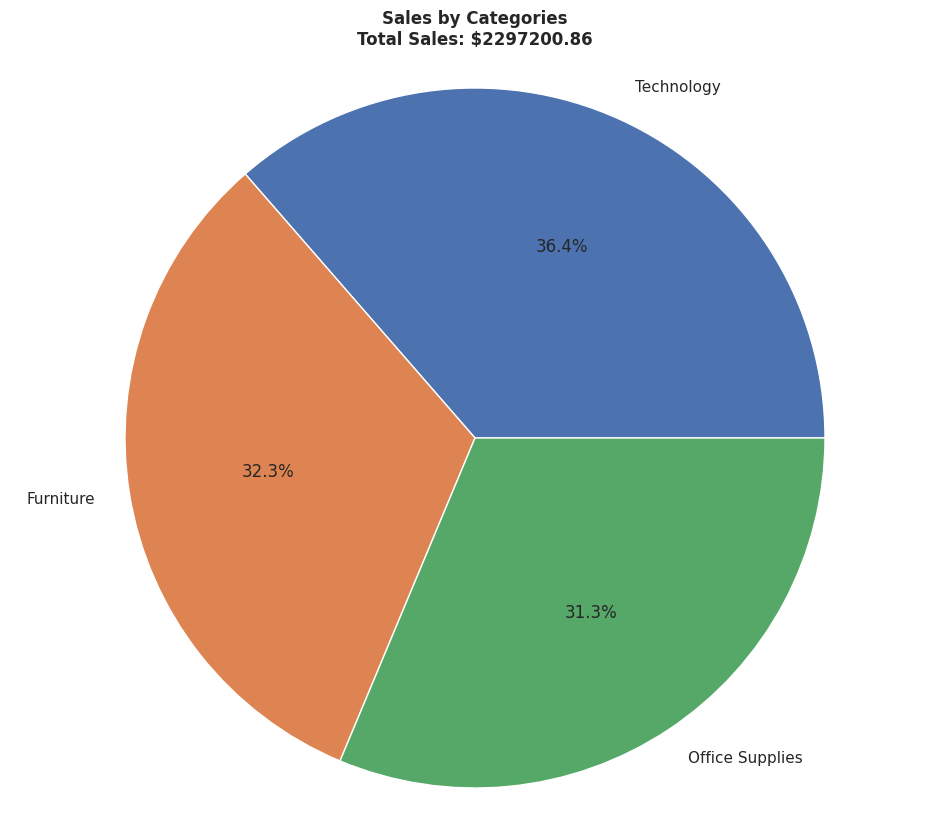

In [19]:
Total_Sales=df['Sales'].sum().round(2)
Sales_by_Categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(3)

plt.pie(Sales_by_Categories, labels=Sales_by_Categories.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sales by Categories\nTotal Sales: ${:.2f}'.format(Total_Sales), fontweight='bold')
plt.show()

In [20]:
fig = px.sunburst(
    df,
    path=["Category", "Sub-Category"],
    values="Sales",
    color="Sales",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=2.1,
    width=700,
    height=700
)

fig.update_traces(hovertemplate="<b>Sales: $%{value:.2f}")
 
fig.update_layout(
    title="<b>Sales",
    title_font={"size": 20},
    margin=dict(t=50, b=50, l=0, r=0),
)
fig.show()

In [21]:
Sales_by_Sub_Cat = df.groupby(['Category','Sub-Category'])[['Sales']].sum().sort_values(by='Sales', ascending=False).reset_index()

fig = px.bar(Sales_by_Sub_Cat, x='Sub-Category', y='Sales',
             color='Category',
             barmode = 'stack',
            )


fig.update_layout(
             xaxis_title = '<b>Sub-Category',
             yaxis_title = '<b>Value ($)',
             title= "<b>Sales by Sub-Category<b>",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )
fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>')

fig.show()

In [22]:
Sales_by_Sub_Cat = df.groupby(['Category','Sub-Category'])[['Sales']].sum().sort_values(by='Sales', ascending=False).reset_index()

fig = px.bar(Sales_by_Sub_Cat, x='Category', y='Sales', color='Sub-Category',text='Sub-Category')

fig.update_layout(
             xaxis_title = '<b>Category',
             yaxis_title = '<b>Value ($)',
             title= "<b>Sales by Category - Sub-Category<b>",
             title_font_size = 20,
             showlegend=False,
             )

fig.update_traces(hovertemplate='Sales: $%{y:,.2f}<extra></extra>')

fig.show()

In [23]:
Stores_by_State = df["State"].value_counts().to_frame().reset_index().head(15)

Table=PrettyTable()
Table.field_names=["State","#Stores"]

for index, row in Stores_by_State.iterrows():
    Table.add_row([(row['State']),(row['count'])])

print(Table)

+----------------+---------+
|     State      | #Stores |
+----------------+---------+
|   California   |   2001  |
|    New York    |   1128  |
|     Texas      |   985   |
|  Pennsylvania  |   587   |
|   Washington   |   506   |
|    Illinois    |   492   |
|      Ohio      |   469   |
|    Florida     |   383   |
|    Michigan    |   255   |
| North Carolina |   249   |
|    Arizona     |   224   |
|    Virginia    |   224   |
|    Georgia     |   184   |
|   Tennessee    |   183   |
|    Colorado    |   182   |
+----------------+---------+


In [24]:
fig = px.bar(Stores_by_State, x='State', y='count',
             labels={'count':'Store Qty'},
             color='State'
            )
fig.update_layout(
             yaxis_title = '<b>Store Qty',
             xaxis_title = '<b>State',
             title='<b>Number of Stores by State<b>',
             title_font_size = 20,
             showlegend=False,
             )

fig.show()

In [25]:
Sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(15)

fig = px.bar(Sales, x=Sales.index, y='Sales',
             color=Sales.index
            )

fig.update_layout(
             yaxis_title = '<b>Sales',
             xaxis_title = '<b>State',
             title='<b>Sales by State - Top 15<b>',
             title_font_size = 20,
             showlegend=False,
             )
fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>')
fig.show()

In [26]:

# Tu DataFrame existente
SalesUSA = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

# Creación del mapa coroplético
fig = px.choropleth(SalesUSA, 
                    geojson=us_states_geojson,
                    locations='State',   # Nombre de la columna en el DataFrame
                    featureidkey="properties.name",
                    color= 'Sales',   # Nombre de la columna en el DataFrame
                    color_continuous_scale='Viridis',  # Elige una paleta de colores
                   
                    )

fig.update_layout(
             yaxis_title = '<b>Sales',
             xaxis_title = '<b>State',
             title='<b>Sales by State',
             title_font_size = 20,
             showlegend=False,
             geo_scope='usa'
             )
fig.update_traces(hovertemplate='%{location}<br>Sales: $%{z:,.2f}<extra></extra>')

fig.show()

In [27]:
Sales_by_Cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(15)

fig = px.bar(Sales_by_Cities, x=Sales_by_Cities.index, y='Sales',
            color=Sales_by_Cities.index
            )
fig.update_layout(
             yaxis_title = '<b>Sales',
             xaxis_title = '<b>City',
             title='<b>Sales by City - Top 15<b>',
             title_font_size = 20,
             showlegend=False,
             )
fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>')
fig.show()

In [28]:
Sales_by_Cities = df.groupby('Customer Name')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False).head(5)

fig = px.bar(Sales_by_Cities, x=Sales_by_Cities.index, y=['Sales','Profit'],
             color_discrete_map = {'Sales': '#143096', 'Profit': '#14963b'},
             barmode = 'group',
            )

fig.update_layout(
             xaxis_title = '<b>Customer ($)', 
             yaxis_title = '<b>Value ($)',
             title= "<b>Top Customer by Sales - Profit<b>",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )
fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>', selector=dict(name='Sales'))
fig.update_traces(hovertemplate='%{x}<br>Profit: $%{y:,.2f}<extra></extra>', selector=dict(name='Profit'))
fig.show()

In [29]:
Sales_by_Cities = df.groupby('Customer Name')[['Sales','Profit']].sum().sort_values(by='Profit', ascending=False).head(5)

fig = px.bar(Sales_by_Cities, x=Sales_by_Cities.index, y=['Sales','Profit'],
             color_discrete_map = {'Sales': '#14963b', 'Profit': '#143096'},
             barmode = 'group',
            )

fig.update_layout(
             xaxis_title = '<b>Customer ($)', 
             yaxis_title = '<b>Value ($)',
             title= "<b>Top Customer by Profits - Sales<b>",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )
fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>', selector=dict(name='Sales'))
fig.update_traces(hovertemplate='%{x}<br>Profit: $%{y:,.2f}<extra></extra>', selector=dict(name='Profit'))
fig.show()

In [30]:
Shipment_Mode = df["Ship Mode"].value_counts().to_frame().reset_index()

fig = px.bar(Shipment_Mode, x='Ship Mode', y='count',
             title='<b>Ship Mode<b>',
             labels={'count':'Quantity'},
             text= 'count',
             color='Ship Mode'
            )
fig.update_layout(
             xaxis_title = '<b>Ship Mode', 
             yaxis_title = '<b>Quantity',
             title= "<b>Ship Mode",
             title_font_size = 20,
             showlegend=False,
             
            )

fig.show()

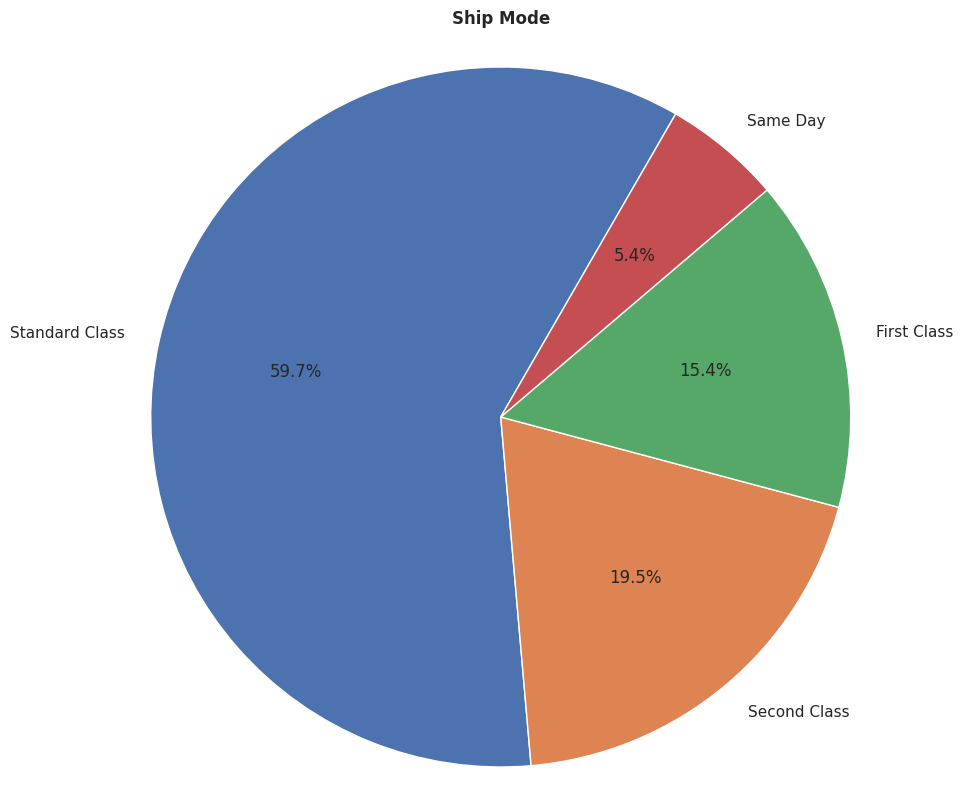

In [31]:
Shipment_Mode = df["Ship Mode"].value_counts().to_frame().reset_index()
labels = Shipment_Mode['Ship Mode']
sizes = Shipment_Mode['count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)

plt.axis('equal')
plt.title("Ship Mode", fontweight='bold') 

plt.show()

In [32]:


Temp = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
Temp = Temp.reset_index()
Temp['Product Name'] = Temp['Product Name'].str[:20]  # Truncate the product names

colors = pc.qualitative.Plotly

fig = go.Figure(go.Bar(
    y=Temp['Product Name'],
    x=Temp['Sales'],
    orientation='h',
    marker=dict(color=colors[:len(Temp)]),
    hovertemplate='Sales: $%{x:,.2f}<extra></extra>'
))

fig.update_layout(
    title='<b>Sales by Product - Top 10</b>',
    title_font_size = 20,
    showlegend=False,
    xaxis_title ='<b>Sales'
)

fig.show()

In [33]:
Temp = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
Temp = Temp.reset_index()
#Temp['Product Name'] = Temp['Product Name'].str[:10]  # Truncate the product names


fig = px.bar(Temp, x='Product Name', y='Sales',
             title='<b>Sales by Product - Top 10</b>',
             color='Product Name',
             #labels={'Product Name': 'Product', 'Sales': 'Sales'},
             hover_data={'Product Name': False},
             )


fig.update_layout(
    title='<b>Sales by Product - Top 10</b>',
    title_font_size = 20,
    showlegend=False,
    xaxis_title =' ',
    yaxis_title ='<b>Sales'
)

fig.update_traces(hovertemplate='%{x}<br>Sales: $%{y:,.2f}<extra></extra>')


fig.show()